# Airbnb in Penang Web Scraping

Date: 12/7/2020

In [1]:
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time

In [2]:
driver = webdriver.Chrome('/Users/jkv/Desktop/chromedriver')

url = 'https://www.airbnb.com/s/Penang-Malaysia/homes?tab_id=all_tab&refinement_paths%5B%5D=%2Fhomes&query=Penang%20Malaysia&place_id=ChIJ3ZBTCQOUSjARP2OP86UFwyk&source=structured_search_input_header&search_type=search_query'
driver.get(url)

## Title, Url, Price and Rating for 100 Rooms

In [3]:
Title = []
Full_url = []
Price = []
Rating = []
nextpage= 20

df = pd.DataFrame(columns=['Title','Full_url','Price','Rating'])


for pages in range(1,6):
    time.sleep(10)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    list_of_rooms = soup.findAll('div', attrs={'itemprop':'itemListElement'})

    for rooms in list_of_rooms:

        # Title
        title_tag = rooms.find('a')
        title = title_tag['aria-label']
        Title.append(title)
    
        # URL
        partial_url = title_tag['href']
        full_url = 'http://airbnb.com'+ partial_url
        Full_url.append(full_url)
    
        # Price
        price_tag = rooms.find(text='Price:')
        price_tag_parent = price_tag.parent
        price = price_tag_parent.nextSibling
        Price.append(price)
    
        # Rating
        rating_tag = rooms.find("span",text=re.compile(r" out of 5;"))
        rating = rating_tag.text.replace('Rating ','')
        rating = rating.replace(' out of 5;','')
        Rating.append(rating)
    
    nextpage += 20    
    next_url = "https://www.airbnb.com/s/penang/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&source=structured_search_input_header&search_type=pagination&federated_search_session_id=d2a9e78c-25af-4487-b69a-61587312b774&place_id=ChIJ3ZBTCQOUSjARP2OP86UFwyk&section_offset=3&items_offset=" +str(nextpage)+ "&query=Penang%2C%20Malaysia"
    driver.get(next_url)

data = {'Title':Title, 'Full_url':Full_url, 'Price':Price, 'Rating':Rating}
df= pd.DataFrame.from_dict(data)

In [4]:
df

,Title,Full_url,Price,Rating
0,Maritime*THE PANORAMA | 日出无敌全海景 @ GEORGETOWN,http://airbnb.com/rooms/12630247?location=Pena...,$28,4.63
1,Heritage Family Suite 2 @ 3pax @ Near Gurney D...,http://airbnb.com/rooms/21172108?location=Pena...,$8,4.66
2,★ Couples Getaway ★ Cozy Suite Sleeps 1~4 | 城市...,http://airbnb.com/rooms/21051454?location=Pena...,$16,4.78
3,Penang Macalister Georgetown,http://airbnb.com/rooms/32252387?location=Pena...,$10,4.79
4,Seafront Scandinavian Home ‖ 北欧风格日出无敌海景套房,http://airbnb.com/rooms/8741307?location=Penan...,$28,4.38
...,...,...,...,...
95,RainHill Boutique Guesthouse -Georgetown Penang,http://airbnb.com/rooms/7182284?location=penan...,RM68,4.67
96,Georgetown@ Modern Suite 乔治市舒适套房 <1- 4 pax>,http://airbnb.com/rooms/23221205?location=pena...,RM122,4.89
97,Stylish Studio Suite Near Gurney Drive Waterfront,http://airbnb.com/rooms/29404424?location=pena...,RM148,4.95
98,March PROMO!!! K-Suite 180° FULL SEAVIEW DUPLEX,http://airbnb.com/rooms/18089339?location=pena...,RM250,4.75


## Reviews for first room

In [5]:
url1 = 'https://www.airbnb.com/rooms/12630247?location=penang&source_impression_id=p3_1588673181_RCgXtD%2FhjuKx2VE4&guests=1&adults=1'

# Use Webdriver
driver = webdriver.Chrome('/Users/jkv/Desktop/chromedriver')
driver.get(url1)
soup1 = BeautifulSoup(driver.page_source,'html.parser')

In [7]:
names = []
reviews = []

soup_list = soup1.findAll("div", attrs={"id":"reviews"})

for item in range (len(soup_list)):
    # Get Name
    name = soup_list[item].findAll("div",attrs={'class':'_1p3joamp'})
    for items in range (len(name)):
        print(name[items].text)
        names.append(name[items].text)
    
        
    # Get Review
    review = soup_list[item].findAll('div',attrs={'class':'_czm8crp'})
    for items in range (len(review)):
        print(review[items].text)
        reviews.append(review[items].text)


4.8
4.8
4.7
4.7
4.6
4.6
Kimberly
Tah
Nicole
Eve
Brian
Gavin
Katy
We had a nice stay. The view is amazing and food was nearby. The value can not be beat for the view and number of beds. Thanks for a lovely stay.
The place is nice and good for the money but it’s way far from luxury.... the place gets beautiful view and nice (Website hidden by Airbnb) towels provided as it described.... no hot water for shower even there was a machine there. There was no paper towels but one dark red rack…Read more
Ben’s place had great views and a nice swimming pool. I would stay again!
We had a great time at Ben’s place. 
The apartment is very comfortable , clean, spacious and calming place. Location is very convenient, it is close to all the lovely restaurants and bars of the area. The whole place made us feel at ease. Ben was very nice, easy to talk to and…Read more
Wow. A total 5 star stay. Exactly as pictured and even more beautiful. STUNNING 180° views of the water. Probably the best unit in the co

## Visualizing reviews for first room with wordcloud

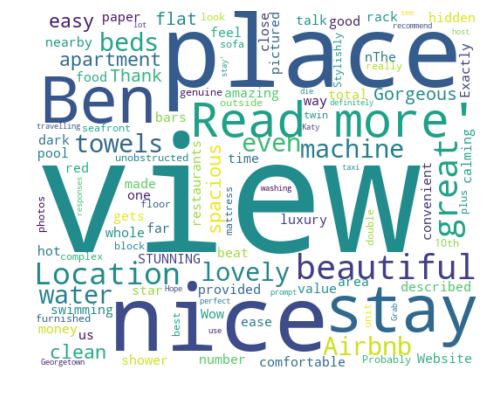

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

wordcloud  = WordCloud(width = 512, height = 412, background_color='white', max_words=500, stopwords=STOPWORDS)

wordcloud.generate(str(reviews))

plt.figure(figsize=(8,8)) # inches
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## NLP using NLTK for first room reviews

In [10]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))

sentences = sent_tokenize(str(reviews))
words = word_tokenize(str(reviews))

In [11]:
filtered=[]
for w in words:
    if w not in stop_words:
        filtered.append(w)

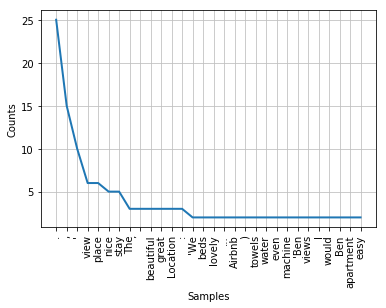

In [12]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

fdist= FreqDist(filtered)
fdist.plot(30,cumulative=False)

plt.show()

In [13]:
from textblob import TextBlob

blob = TextBlob(str(reviews))

print(blob.noun_phrases)

["[ 'we", 'thanks', "'the place", '’ s way', 'luxury ...', 'beautiful view', 'website', 'airbnb', 'hot water', 'paper towels', 'dark red rack…read', "'ben ’ s place", 'great views', 'great time', 'ben', '’ s place', '\\nthe apartment', 'location', 'lovely restaurants', 'whole place', 'ben', 'star stay', 'exactly', 'stunning', 'stylishly', 'clean', 'spacious', 'double beds', 'twin mattress', "'gorgeous seafront apartment", 'location', 'georgetown', 'grab', 'great host', 'location', 'airbnb', 'katy', 'hope']
